## Feature engineering and polynomial regression 
- Feature engineering: Using domain knowledge to design new features by transforming a feature or combining features. 
- Polynomial regression: Raising features to its power. 

#### Goal
exploring feature engineering and polynomial regression which allows the use of machinery of linear regression to fit very complicated, even very non-linear functions.

### Feature Engineering and Polynomial Regression Overview

Out of the box, linear regression provides a means of building models of the form:<br>
<br>
*What if features/data are non-linear or are combinations of features?<br>* 
For example,  Housing prices do not tend to be linear with living area but penalize very small or very large houses resulting in the curves shown in the graphic above. How can we use the machinery of linear regression to fit this curve? The 'machinery' we have is the ability to modify the parameters $\mathbf{w}$, $\mathbf{b}$ in (1) to 'fit' the equation to the training data. However, no amount of adjusting of $\mathbf{w}$,$\mathbf{b}$ in (1) will achieve a fit to a non-linear curve.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng

### Polynomial Features

Above we were considering a scenario where the data was non-linear. Let's try using what we know so far to fit a non-linear curve. We'll start with a simple quadratic: $y = 1+x^2$
We'll use [`np.c_[..]`](https://numpy.org/doc/stable/reference/generated/numpy.c_.html) which is a NumPy routine to concatenate along the column boundary.

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.69806954], b: -52.0834


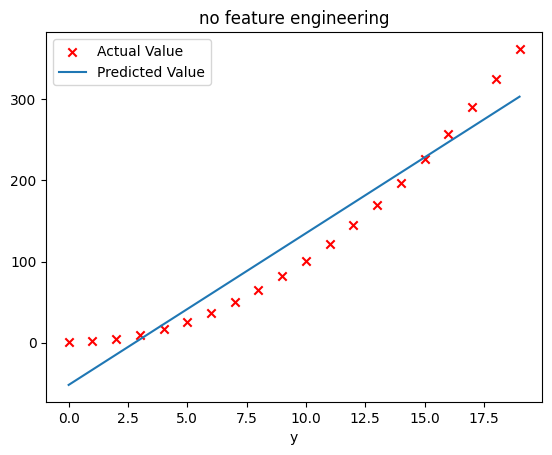

In [3]:
## Creating data
x=np.arange(0,20,1)
y=1+x*x
X=x.reshape(-1,1)
model_w,model_b=run_gradient_descent_feng(X,y,iterations=1000,alpha=1e-2)

plt.scatter(x,y,marker='x',c='r',label="Actual Value")
plt.title("no feature engineering")

plt.plot(x,X@model_w+model_b,label="Predicted Value")
plt.xlabel("y")
plt.legend()

plt.show()

As expected, not a great fit. What is needed is something like $y= w_0x_0^2 + b$, or a **polynomial feature**.
To accomplish this, you can modify the *input data* to *engineer* the needed features. If you swap the original data with a version that squares the $x$ value, then you can achieve $y= w_0x_0^2 + b$. Let's try it. Swap `X` for `X**2` below:

Iteration         0, Cost: 7.71436e+02
Iteration       100, Cost: 3.52675e+01
Iteration       200, Cost: 1.81806e+00
Iteration       300, Cost: 2.98015e-01
Iteration       400, Cost: 2.28747e-01
Iteration       500, Cost: 2.25397e-01
Iteration       600, Cost: 2.25043e-01
Iteration       700, Cost: 2.24825e-01
Iteration       800, Cost: 2.24613e-01
Iteration       900, Cost: 2.24402e-01
w,b found by gradient descent: w: [1.01815531], b: 0.0235


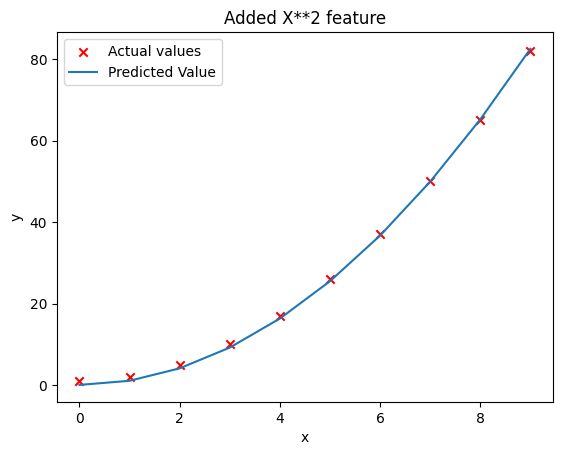

In [4]:
#Creating data 
x=np.arange(0,10,1)
y=1+x**2

#Engineered feature
X=x**2

X=X.reshape(-1,1)
model_w,model_b=run_gradient_descent_feng(X,y,iterations=1000,alpha=1e-5)

plt.scatter(x,y,marker='x',c='r',label="Actual values")

plt.title("Added X**2 feature")
plt.plot(x,X@model_w+model_b,label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()

It is near fit!<br>
The values of $\mathbf{w}$ and b printed right above the graph: `w,b found by gradient descent: w: [1.], b: 0.0490`. Gradient descent modified our initial values of $\mathbf{w},b $ to be (1.0,0.049) or a model of $y=1*x_0^2+0.049$, very close to our target of $y=1*x_0^2+1$.

### Selecting Features
Above, we knew that an $x^2$ term was required. It may not always be obvious which features are required. One could add a variety of potential features to try and find the most useful. For example, what if we had instead tried : $y=w_0x_0 + w_1x_1^2 + w_2x_2^3+b$ ? 


In [5]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #column-wise concatenation

print("features")
print(X)

features
[[   0    0    0]
 [   1    1    1]
 [   2    4    8]
 [   3    9   27]
 [   4   16   64]
 [   5   25  125]
 [   6   36  216]
 [   7   49  343]
 [   8   64  512]
 [   9   81  729]
 [  10  100 1000]
 [  11  121 1331]
 [  12  144 1728]
 [  13  169 2197]
 [  14  196 2744]
 [  15  225 3375]
 [  16  256 4096]
 [  17  289 4913]
 [  18  324 5832]
 [  19  361 6859]]


Iteration         0, Cost: 1.14029e+03
Iteration       100, Cost: 3.78840e+02
Iteration       200, Cost: 3.72891e+02
Iteration       300, Cost: 3.67035e+02
Iteration       400, Cost: 3.61271e+02
Iteration       500, Cost: 3.55598e+02
Iteration       600, Cost: 3.50013e+02
Iteration       700, Cost: 3.44517e+02
Iteration       800, Cost: 3.39106e+02
Iteration       900, Cost: 3.33781e+02
w,b found by gradient descent: w: [0.01166045 0.07760103 0.0552212 ], b: 0.0015


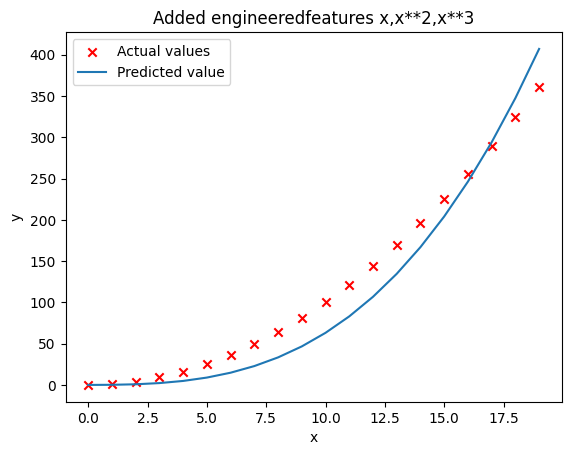

In [6]:
model_w,model_b=run_gradient_descent_feng(X,y,iterations=1000,alpha=1e-7)

plt.scatter(x,y,marker='x',c='r',label='Actual values')

plt.title("Added engineeredfeatures x,x**2,x**3")
plt.plot(x,X@model_w+model_b,label="Predicted value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

The value of $\mathbf{w}$, `[0.08 0.54 0.03]` and b is `0.0106`.This implies the model after fitting/training is:
$$ 0.08x + 0.54x^2 + 0.03x^3 + 0.0106 $$
Gradient descent has emphasized the data that is the best fit to the $x^2$ data by increasing the $w_1$ term relative to the others.  If you were to run for a very long time, it would continue to reduce the impact of the other terms. 
>Gradient descent is picking the 'correct' features for us by emphasizing its associated parameter

Let's review this idea:
- less weight value implies less important/correct feature, and in extreme, when the weight becomes zero or very close to zero, the associated feature is not useful in fitting the model to the data.
- above, after fitting, the weight associated with the $x^2$ feature is much larger than the weights for $x$ or $x^3$ as it is the most useful in fitting the data. 

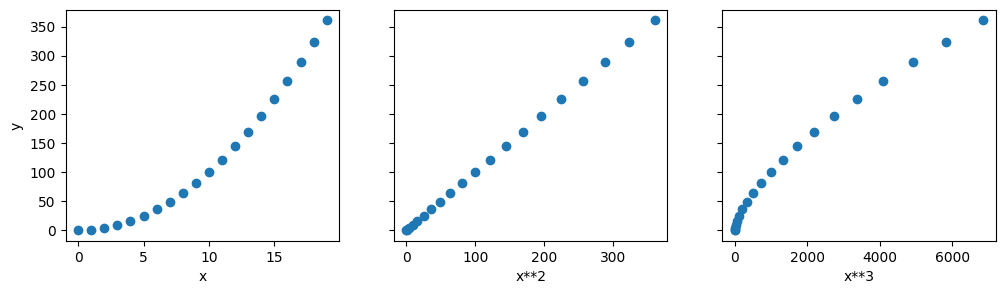

In [7]:
 #VIEWING CLEARLY 
x=np.arange(0,20,1)
y=x**2
X=np.c_[x,x**2,x**3]
X_features=['x','x**2','x**3']

#Plotting 
fig,ax=plt.subplots(1,3,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

Here, x^2 feature mapped with the target value y is linear. So, linear regression can easily generate a model using this feature.

### Scaling features
If the data set has features with significantly different scales, one should apply feature scaling to speed gradient descent. In the example above, there is $x$, $x^2$ and $x^3$ which will naturally have very different scales. Applying Z-score normalization.

In [8]:
# create target data
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

# add mean_normalization 
X = zscore_normalize_features(X)     
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw        X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.29501788 3.18076489 3.28307153]


Iteration         0, Cost: 9.42147e+03
Iteration     10000, Cost: 3.90938e-01
Iteration     20000, Cost: 2.78389e-02
Iteration     30000, Cost: 1.98242e-03
Iteration     40000, Cost: 1.41169e-04
Iteration     50000, Cost: 1.00527e-05
Iteration     60000, Cost: 7.15855e-07
Iteration     70000, Cost: 5.09763e-08
Iteration     80000, Cost: 3.63004e-09
Iteration     90000, Cost: 2.58497e-10
w,b found by gradient descent: w: [5.26616826e-05 1.13494579e+02 8.43238777e-05], b: 123.5000


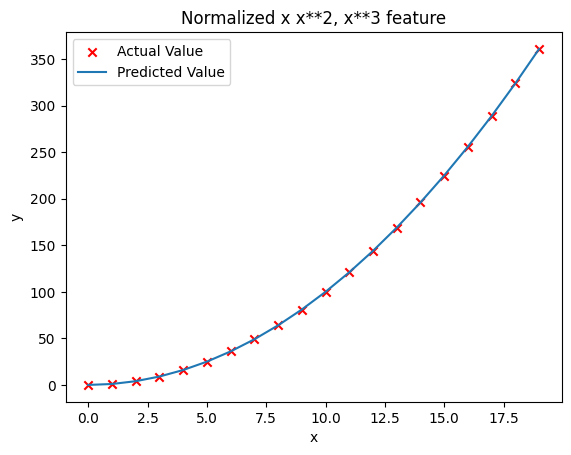

In [9]:
#alpha changeed here
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X) 

model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Feature scaling allows this to converge much faster.   
Note again the values of $\mathbf{w}$. The $w_1$ term, which is the $x^2$ term is the most emphasized. Gradient descent has all but eliminated the $x^3$ term.

Iteration         0, Cost: 2.20188e-01
Iteration    100000, Cost: 1.70074e-02
Iteration    200000, Cost: 1.27603e-02
Iteration    300000, Cost: 9.73032e-03
Iteration    400000, Cost: 7.56440e-03
Iteration    500000, Cost: 6.01412e-03
Iteration    600000, Cost: 4.90251e-03
Iteration    700000, Cost: 4.10351e-03
Iteration    800000, Cost: 3.52730e-03
Iteration    900000, Cost: 3.10989e-03
w,b found by gradient descent: w: [ -1.33565562 -10.00231728  24.77799625   5.96170981 -12.48587921
 -16.26275994  -9.50807133   0.59194813   8.70295901  11.9412625
   9.27097351   0.78896901 -12.81745188], b: -0.0073


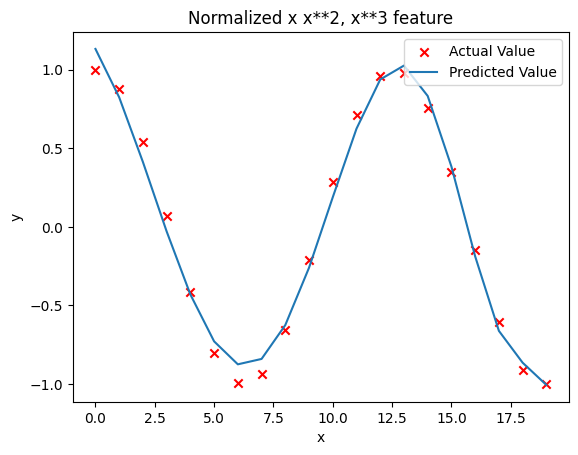

In [10]:
#Complex 
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X) 

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()
